In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, normalize

import sys
import os
sys.path.insert(0,os.path.abspath('../scripts'))

import functions as fn
import user_experience as ue
import importlib
importlib.reload(fn)
importlib.reload(ue)


<module 'user_experience' from 'c:\\Users\\HP\\Desktop\\TenX\\user-overview-analysis\\scripts\\user_experience.py'>

In [3]:
cleaned_data = pd.read_csv('../data/clean_telecom_data.csv')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148506 non-null  float64
 1   Start                           148506 non-null  object 
 2   Start ms                        148506 non-null  float64
 3   End                             148506 non-null  object 
 4   End ms                          148506 non-null  float64
 5   Dur. (ms)                       148506 non-null  float64
 6   IMSI                            148506 non-null  float64
 7   MSISDN/Number                   148506 non-null  float64
 8   IMEI                            148506 non-null  float64
 9   Last Location Name              148506 non-null  object 
 10  Avg RTT DL (ms)                 148506 non-null  float64
 11  Avg RTT UL (ms)                 148506 non-null  float64
 12  Avg Bearer TP DL

In [4]:
user_experience_data = cleaned_data[[
    "MSISDN/Number",
    "Avg RTT DL (ms)",
    "Avg RTT UL (ms)",
    "Avg Bearer TP DL (kbps)",
    "Avg Bearer TP UL (kbps)",
    "Handset Type"]].copy()

In [5]:
# Instantiate UserOverViewScript class in user_overview_script 

user_overview_script = ue.UserOverviewScript(user_experience_data)

In [6]:
# Convert Average RTT millisecond values to sec

user_experience_data['Avg RTT DL (ms)'] = user_overview_script.convert_ms_to_sec(\
    user_experience_data['Avg RTT DL (ms)'])

user_experience_data['Avg RTT UL (ms)'] = user_overview_script.convert_ms_to_sec(\
    user_experience_data['Avg RTT UL (ms)'])

In [7]:
# Bring back the deleted TCP Retransmission volume column during data cleaning from the original data 

df = pd.read_csv('../data/Week2_challenge_data_source(CSV).csv')
user_experience_data['TCP DL Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)']
user_experience_data['TCP UL Retrans. Vol (Bytes)'] = df['TCP UL Retrans. Vol (Bytes)']

In [8]:
user_experience_data['TCP DL Retrans. Vol (Bytes)'] = user_overview_script.convert_bytes_to_kbytes(\
    user_experience_data['TCP DL Retrans. Vol (Bytes)'])

user_experience_data['TCP UL Retrans. Vol (Bytes)'] = user_overview_script.convert_bytes_to_kbytes(\
    user_experience_data['TCP UL Retrans. Vol (Bytes)'])

In [9]:
user_experience_data.rename(columns = {\
        'Avg RTT DL (ms)':'Avg_RTT_DL_(sec)',\
        'Avg RTT UL (ms)':'Avg_RTT_UL_(sec)',\
        'TCP DL Retrans. Vol (Bytes)':'TCP_DL_Retrans_Vol_(kbps)',\
        'TCP UL Retrans. Vol (Bytes)':'TCP_UL_Retrans_Vol_(kbps)'
    }, inplace=True)

In [10]:
# to check data information
user_experience_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   MSISDN/Number              148506 non-null  float64
 1   Avg_RTT_DL_(sec)           148506 non-null  float64
 2   Avg_RTT_UL_(sec)           148506 non-null  float64
 3   Avg Bearer TP DL (kbps)    148506 non-null  float64
 4   Avg Bearer TP UL (kbps)    148506 non-null  float64
 5   Handset Type               148506 non-null  object 
 6   TCP_DL_Retrans_Vol_(kbps)  61271 non-null   float64
 7   TCP_UL_Retrans_Vol_(kbps)  52879 non-null   float64
dtypes: float64(7), object(1)
memory usage: 9.1+ MB


In [11]:
# Handle null values of TCP Retransmission volume columns with mean and median based on Skewness value 

user_experience_data = ue.DataFrameCleaning(user_experience_data)
columns = ['TCP_DL_Retrans_Vol_(kbps)', 'TCP_UL_Retrans_Vol_(kbps)']
user_experience_data.fill_numerical_column(columns)

Automation in Action...Great!!!


In [12]:
# Count null values if any

user_experience_data = ue.DataFrameInfo(user_experience_data.df)
user_experience_data.get_null_counts()

MSISDN/Number                0
Avg_RTT_DL_(sec)             0
Avg_RTT_UL_(sec)             0
Avg Bearer TP DL (kbps)      0
Avg Bearer TP UL (kbps)      0
Handset Type                 0
TCP_DL_Retrans_Vol_(kbps)    0
TCP_UL_Retrans_Vol_(kbps)    0
dtype: int64


In [13]:
# Convert dataframe object to dataframe

user_experience_data = user_experience_data.df

In [14]:
user_experience_data['Total_Avg_RTT'] = user_experience_data['Avg_RTT_DL_(sec)'] + \
                                      user_experience_data['Avg_RTT_UL_(sec)']

user_experience_data['Total_Avg_Bearer_TP'] = user_experience_data['Avg Bearer TP DL (kbps)'] + \
                                      user_experience_data['Avg Bearer TP UL (kbps)']

user_experience_data['Total_Avg_TCP'] = user_experience_data['TCP_DL_Retrans_Vol_(kbps)'] + \
                                      user_experience_data['TCP_DL_Retrans_Vol_(kbps)']
user_experience_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   MSISDN/Number              148506 non-null  float64
 1   Avg_RTT_DL_(sec)           148506 non-null  float64
 2   Avg_RTT_UL_(sec)           148506 non-null  float64
 3   Avg Bearer TP DL (kbps)    148506 non-null  float64
 4   Avg Bearer TP UL (kbps)    148506 non-null  float64
 5   Handset Type               148506 non-null  object 
 6   TCP_DL_Retrans_Vol_(kbps)  148506 non-null  float64
 7   TCP_UL_Retrans_Vol_(kbps)  148506 non-null  float64
 8   Total_Avg_RTT              148506 non-null  float64
 9   Total_Avg_Bearer_TP        148506 non-null  float64
 10  Total_Avg_TCP              148506 non-null  float64
dtypes: float64(10), object(1)
memory usage: 12.5+ MB


In [15]:
user_experience_agg = user_experience_data.groupby('MSISDN/Number').agg({
    'Total_Avg_RTT': 'sum',
    'Total_Avg_Bearer_TP': 'sum',
    'Total_Avg_TCP': 'sum',
    'Handset Type': [lambda x: x.mode()[0]]})

user_experience = pd.DataFrame(columns=[
    "Total_Avg_RTT",
    "Total_Avg_Bearer_TP",
    "Total_Avg_TCP",
    "Handset Type"])

user_experience["Total_Avg_RTT"] = user_experience_agg["Total_Avg_RTT"]['sum']
user_experience["Total_Avg_Bearer_TP"] = user_experience_agg["Total_Avg_Bearer_TP"]['sum']
user_experience["Total_Avg_TCP"] = user_experience_agg["Total_Avg_TCP"]['sum']
user_experience["Handset Type"] = user_experience_agg["Handset Type"]['<lambda>']
user_experience.head()

,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP,Handset Type
MSISDN/Number,,,,
3.360100e+10,0.046,76.0,84998.414062,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,0.031,99.0,1119.757812,Apple iPhone 7 (A1778)
3.360100e+10,0.033,97.0,1119.757812,Huawei B528S-23A
3.360101e+10,0.084,248.0,366.238281,Apple iPhone 5S (A1457)
3.360101e+10,0.119,56844.0,1858.683594,Apple iPhone Se (A1723)


<Axes: >

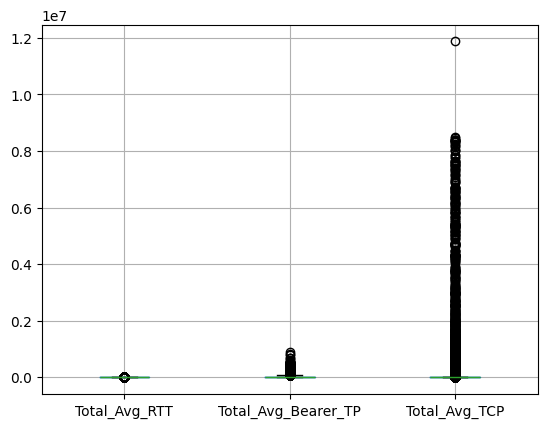

In [16]:
# displaying outlier
user_experience.boxplot()

Task 3.2 compute & list 10 of the top, bottom and most frequent
    a. TCP values in dataset
    b. RTT values in the dataset
    c. Throught values in the dataset

In [17]:
#Sort Dataset by TCP Values
sorted_by_tcp = user_experience_data.sort_values(
    'Total_Avg_TCP', ascending=False)
top_10 = sorted_by_tcp.head(10)['Total_Avg_TCP']
last_10 = sorted_by_tcp.tail(10)['Total_Avg_TCP']
most_10 = user_experience_data['Total_Avg_TCP'].value_counts().head(10)

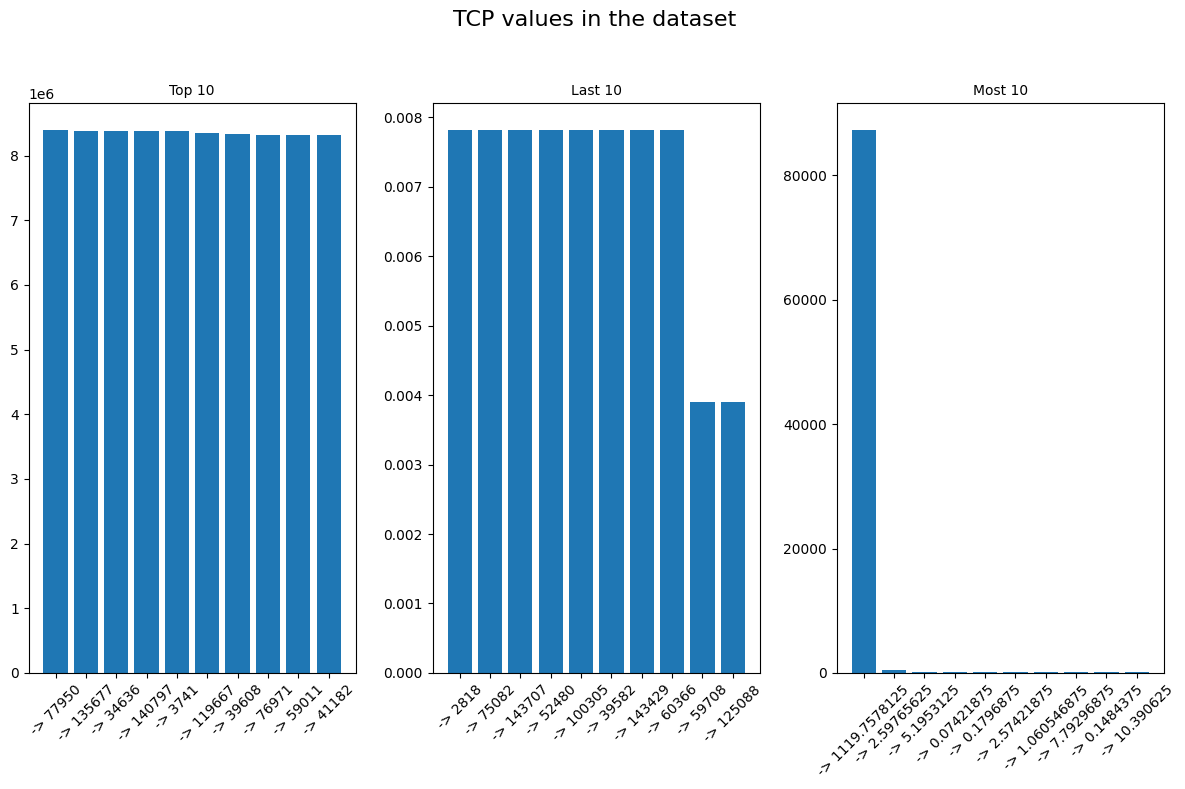

In [18]:
fn.mult_hist([top_10, last_10, most_10], 1,
          3, "TCP values in the dataset", ['Top 10', 'Last 10', 'Most 10'])

In [19]:
#Sort Dataset by RTT Values
sorted_by_RTT = user_experience_data.sort_values(
    'Total_Avg_RTT', ascending=False)
top_10 = sorted_by_RTT.head(10)['Total_Avg_RTT']
last_10 = sorted_by_RTT.tail(10)['Total_Avg_RTT']
most_10 = user_experience_data['Total_Avg_RTT'].value_counts().head(10)

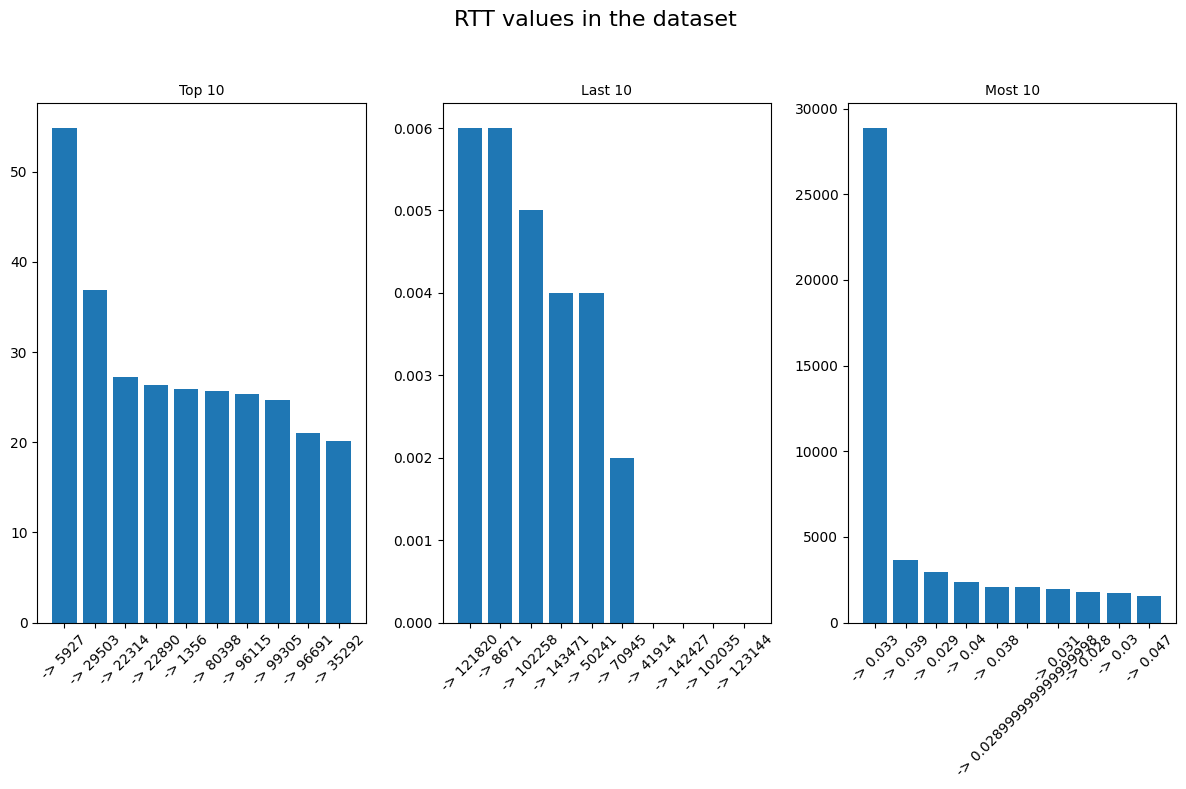

In [20]:
fn.mult_hist([top_10, last_10, most_10, top_10], 1,
          3, "RTT values in the dataset", ['Top 10', 'Last 10', 'Most 10'])

In [21]:
#Sort Dataset by Throughput Values 
sorted_by_Bearer_TP = user_experience_data.sort_values(
    'Total_Avg_Bearer_TP', ascending=False)
top_10 = sorted_by_Bearer_TP.head(10)['Total_Avg_Bearer_TP']
last_10 = sorted_by_Bearer_TP.tail(10)['Total_Avg_Bearer_TP']
most_10 = user_experience_data['Total_Avg_Bearer_TP'].value_counts().head(10)

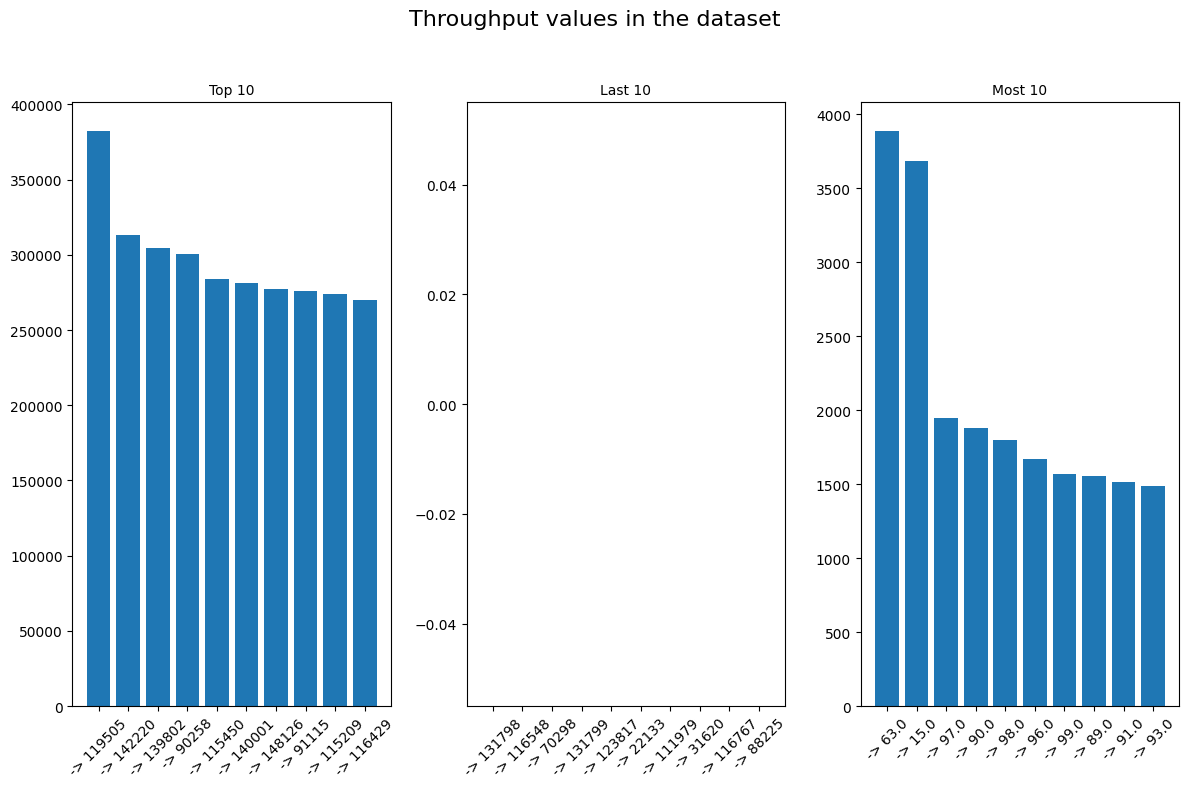

In [22]:
fn.mult_hist([top_10, last_10, most_10, top_10], 1,
          3, "Throughput values in the dataset", ['Top 10', 'Last 10', 'Most 10'])

Task 3.3.
    d. Compute the distribution of the average throughput  per handset type 
    e. Compute the average TCP retransmission view per handset type 

In [23]:
handset_type_agg = user_experience_data.groupby('Handset Type').agg(
    {'Total_Avg_Bearer_TP': 'mean', 'Total_Avg_TCP': 'mean'})
handset_type_agg.head()

,Total_Avg_Bearer_TP,Total_Avg_TCP
Handset Type,,
A-Link Telecom I. Cubot A5,23510.0,28.558594
A-Link Telecom I. Cubot Note Plus,6699.0,1119.757812
A-Link Telecom I. Cubot Note S,8937.0,1119.757812
A-Link Telecom I. Cubot Nova,56217.0,1119.757812
A-Link Telecom I. Cubot Power,69468.0,0.179688


In [24]:
sorted_by_tp = handset_type_agg.sort_values('Total_Avg_Bearer_TP', ascending=False)
top_tp = sorted_by_tp['Total_Avg_Bearer_TP']
 
sns.distplot(top_tp)
pd.DataFrame(top_tp.describe()) 

C:\Users\HP\AppData\Local\Temp\ipykernel_22228\1113202952.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(top_tp)


,Total_Avg_Bearer_TP
count,1390.000000
mean,12430.775996
std,14715.804978
min,0.000000
25%,1367.500000
50%,8623.708333
75%,17421.189024
max,108994.230769


Task 3.4.
Perform a K-Means clustering (where k = 3) to segment users into groups of experiences.

In [25]:
experiance_metric_df = user_experience[[
    "Total_Avg_RTT",
    "Total_Avg_Bearer_TP",
    "Total_Avg_TCP"]].copy()
experiance_metric_df.head()

,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP
MSISDN/Number,,,
3.360100e+10,0.046,76.0,84998.414062
3.360100e+10,0.031,99.0,1119.757812
3.360100e+10,0.033,97.0,1119.757812
3.360101e+10,0.084,248.0,366.238281
3.360101e+10,0.119,56844.0,1858.683594


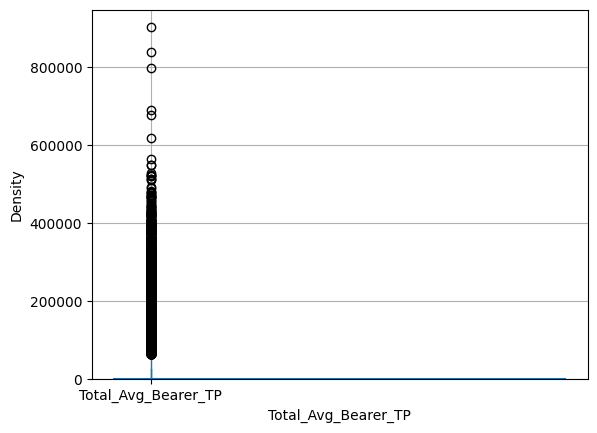

In [26]:
# Generate the boxplot
user_experience.boxplot(column='Total_Avg_Bearer_TP')

# Show the plot
plt.show()

In [27]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(experiance_metric_df)
pd.DataFrame(scaled_array).head(5)

,0,1,2
0,-0.178845,-0.492524,0.221159
1,-0.205141,-0.491983,-0.084914
2,-0.201635,-0.492030,-0.084914
3,-0.112226,-0.488476,-0.087664
4,-0.050867,0.843523,-0.082218


In [28]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

,0,1,2
0,-0.314452,-0.865976,0.388852
1,-0.380061,-0.911485,-0.157318
2,-0.374453,-0.913739,-0.157692
3,-0.220566,-0.960035,-0.172291
4,-0.059911,0.993496,-0.096835


In [29]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_normalized)
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
experiance_metric_df.insert(0, 'Cluster', kmeans.labels_)
experiance_metric_df.head(10)

,Cluster,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP
MSISDN/Number,,,,
3.360100e+10,1,0.046,76.0,84998.414062
3.360100e+10,1,0.031,99.0,1119.757812
3.360100e+10,1,0.033,97.0,1119.757812
3.360101e+10,1,0.084,248.0,366.238281
3.360101e+10,0,0.119,56844.0,1858.683594
3.360101e+10,1,0.057,7908.0,2239.515625
3.360101e+10,0,0.053,42513.0,2239.515625
3.360101e+10,1,0.052,1247.0,1119.757812
3.360101e+10,1,0.066,189.0,989.105469


In [31]:
experiance_metric_df['Cluster'].value_counts()


Cluster
1    70002
0    28211
2     8258
Name: count, dtype: int64

In [33]:
#experiance_metric_df.to_csv('../data/user_experiance.csv')